# Retrieving Gender Information in Common Nouns & Adjectives [to be finished]
In this Notebook : attempts to isolate Word Embeddings dimension coding for **gender information** (masculine/feminine) in a sample of Word Embeddings for **common Nouns** and **adjectives**.  
- Sample for Nouns = 3000 masculine NOUNS + 3000 feminine NOUNS  
- Sample for Adjectives = 

## 1. Nouns

### Results  

Candidate dimensions are listed in the table below. Colors highlight the fact that there is a large overlap between:  
- dimensions where masc_avg and fem_avg have the largest difference and dimensions that correlate the most to gender  
- dimensions showing lowest std for masculine WE and dimensions showing lowest std for feminine WE  
- interestingly, those two groups do not overlap

[ NOT UPDATED]
| Max diff(masc_avg, fem_avg) | Min std(masc) | Min std(fem) | Max corr(dim, gender) |  
| --- | --- | --- | --- |  
|  <span style='color:green'>100</span>  |  338 |  83 |  <span style='color:green'>100</span> |
|  <span style='color:green'>195</span>  |  <span style='color:blue'>408</span> |  <span style='color:blue'>314</span> |  <span style='color:green'>195</span> |
|  <span style='color:green'>117</span> |  <span style='color:blue'>287</span> |  <span style='color:blue'>287</span> |  <span style='color:green'>117</span> |
|  <span style='color:green'>202</span> |  321 |  <span style='color:blue'>365</span> |  <span style='color:green'>403</span> |
|  <span style='color:green'>403</span> |  101 |  <span style='color:blue'>408</span> |  <span style='color:green'>316</span>  |
|  <span style='color:green'>306</span> |  <span style='color:blue'>365</span> |  <span style='color:blue'>25</span> |  <span style='color:green'>306</span> |
|  <span style='color:green'>245</span> |  <span style='color:blue'>314</span> | <span style='color:blue'>209</span> |  <span style='color:green'>202</span> |
|  <span style='color:green'>316</span>  | <span style='color:blue'>209</span> | <span style='color:blue'>441</span> |  <span style='color:green'>245</span> |
|  <span style='color:green'>499</span>  | <span style='color:blue'>441</span> | 69 | 377 |
|  180 | <span style='color:blue'>25</span> |  63 | <span style='color:green'>499</span>  |  



A first look at the distribution of values for these dimensions between class of masculine nouns and class of feminine nouns allows us to state that:  
- dimensions in <span style="color:blue">blue</span> are not informative for gender. Indeed, they show intra-class low std, but also extra-class low std, meaning that they share similar values among all noun vectors. 
- dimensions 338, 321, 101, 83, 69 and 63 also have very similar distributions between masculine and feminine nouns. They are therefore not informative for gender.  
> **so intra-class low std isn't informative for our task**  

- The distributions are more separated for remaining dimensions and dimensions in <span style="color:green">green</span> in particular. However, the overlap is still very large, and the maximum correlation found between a dimension and gender is only **0.294138** (dimension 100).  



### 0. Data loading

In [99]:
import pandas as pd
# top_freq_n = pd.read_csv('../Data/Frequency/top_frequent_pure_NOUN_Morphalou.csv', index_col="Word")
# top_freq_n = top_freq_n.drop(columns=[ "cgram", "freqlemlivres", "nombre"])
# top_freq_n["frequency rank"] = range(1, len(top_freq_n) + 1)    # Adding a column with the frequency rank
# top_freq_n.drop(columns=["Unnamed: 0"], inplace=True)
# top_masc_n = top_freq_n[top_freq_n["genre"] == "m"][:3000]# Sample of 3000 masculine Nouns
# top_fem_n = top_freq_n[top_freq_n["genre"] == "f"][:3000]# Sample of 3000 feminine Nouns

In [100]:
# top_masc_n.sort_values("Word").head()

In [101]:
# top_fem_n.sort_values("Word").head()

In [102]:
# Now getting the WE for our samples
all_n_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv', index_col=0).drop(columns=["number"])

# Normalization
for i in range(512):
    values, copy = list(all_n_we[str(i)]), list(all_n_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_n_we[str(i)] = [val / (max_ - min_) for val in values]

all_n_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,gender
Word,,,,,,,,,,,,,,,,,,,,,
abaisse,0.220459,-0.185174,0.045101,0.178714,-0.108041,-0.185223,-0.038133,-0.035881,0.206875,0.197348,...,0.185762,-0.084412,0.023871,-0.052849,-0.267209,-0.440458,-0.227911,-0.021792,-0.070034,feminine
abandonnée,0.186562,0.062755,0.030736,-0.143579,0.006462,-0.319613,-0.188934,-0.008268,-0.178685,-0.003653,...,0.023211,-0.053564,-0.200903,-0.081681,-0.337104,-0.226090,-0.244174,0.193163,-0.026614,feminine
abattue,0.260729,0.044799,0.100262,-0.003613,-0.014958,-0.248013,-0.062373,0.089560,0.103828,0.065361,...,0.038298,-0.067715,-0.088245,-0.185171,-0.425530,-0.397078,-0.164545,-0.047245,-0.010448,feminine
abbaye,0.205826,-0.215930,0.101201,0.006262,0.232492,-0.271341,-0.203044,-0.136419,-0.081058,0.065823,...,-0.279662,0.199704,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.219602,feminine
abdominale,0.211081,-0.013678,0.240263,0.032897,0.017872,-0.184198,-0.119463,-0.360880,0.434171,0.266727,...,0.266714,-0.035179,-0.078115,-0.001525,-0.120634,-0.262442,-0.000265,0.190060,-0.191832,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
événements,-0.059005,-0.037699,0.067933,0.216258,0.186763,-0.154193,-0.012498,0.108529,0.028374,-0.045180,...,0.049204,-0.015031,-0.165675,0.123249,-0.085762,-0.165766,-0.297200,0.050490,0.042883,masculine
évêques,-0.015915,-0.219548,-0.061858,0.070170,0.108059,-0.037888,-0.104214,0.093217,0.180943,-0.001320,...,-0.049661,-0.027990,-0.005807,-0.023432,-0.100197,-0.229627,-0.097213,-0.097342,-0.038175,masculine
êtres,0.170110,-0.209239,0.310894,0.106415,0.180311,-0.158953,0.129373,-0.008534,0.085612,0.043121,...,-0.073052,-0.135915,0.035351,-0.048647,0.001023,-0.178523,-0.093425,0.006703,-0.049017,masculine


In [103]:
# masc_n_we = all_n_we.merge(top_masc_n, left_index=True, right_index=True)
# fem_n_we = all_n_we.merge(top_fem_n, left_index=True, right_index=True)
masc_n_we = all_n_we[all_n_we["gender"] == "masculine"]
fem_n_we = all_n_we[all_n_we["gender"] == "feminine"]

In [104]:
masc_n_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,gender
Word,,,,,,,,,,,,,,,,,,,,,
aba,0.232888,-0.318263,-0.196538,0.190990,-0.118470,-0.234869,0.111704,-0.138540,0.110202,0.116387,...,0.024788,-0.100013,-0.184440,-0.000780,-0.280609,-0.057188,-0.127327,-0.287485,-0.158482,masculine
abaissement,0.152097,-0.126432,0.117128,0.007765,-0.055134,-0.285339,-0.039397,0.211560,0.020701,0.141178,...,0.195529,-0.216174,-0.063982,0.087034,-0.162566,-0.450007,-0.259544,0.053780,-0.175741,masculine
abandon,0.182038,-0.097546,-0.059194,-0.203207,-0.093096,-0.209470,-0.240023,0.138944,-0.121443,-0.068391,...,0.029521,0.071358,-0.244310,0.038788,-0.349796,-0.241364,-0.119842,0.133536,-0.151044,masculine
abandonné,0.188409,0.046669,0.038972,-0.140724,-0.010177,-0.376147,-0.118135,0.054863,-0.128970,-0.072569,...,-0.125751,-0.021353,-0.217908,-0.002975,-0.315794,-0.255651,-0.273766,0.116405,-0.231181,masculine
abat,0.347913,-0.087875,-0.161640,0.032956,0.059120,-0.122397,-0.025435,-0.148730,0.127516,0.095984,...,-0.217096,0.061435,-0.064155,-0.205836,-0.131158,-0.360802,-0.020077,0.006438,0.143649,masculine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
événements,-0.059005,-0.037699,0.067933,0.216258,0.186763,-0.154193,-0.012498,0.108529,0.028374,-0.045180,...,0.049204,-0.015031,-0.165675,0.123249,-0.085762,-0.165766,-0.297200,0.050490,0.042883,masculine
évêques,-0.015915,-0.219548,-0.061858,0.070170,0.108059,-0.037888,-0.104214,0.093217,0.180943,-0.001320,...,-0.049661,-0.027990,-0.005807,-0.023432,-0.100197,-0.229627,-0.097213,-0.097342,-0.038175,masculine
êtres,0.170110,-0.209239,0.310894,0.106415,0.180311,-0.158953,0.129373,-0.008534,0.085612,0.043121,...,-0.073052,-0.135915,0.035351,-0.048647,0.001023,-0.178523,-0.093425,0.006703,-0.049017,masculine


In [105]:
fem_n_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,gender
Word,,,,,,,,,,,,,,,,,,,,,
abaisse,0.220459,-0.185174,0.045101,0.178714,-0.108041,-0.185223,-0.038133,-0.035881,0.206875,0.197348,...,0.185762,-0.084412,0.023871,-0.052849,-0.267209,-0.440458,-0.227911,-0.021792,-0.070034,feminine
abandonnée,0.186562,0.062755,0.030736,-0.143579,0.006462,-0.319613,-0.188934,-0.008268,-0.178685,-0.003653,...,0.023211,-0.053564,-0.200903,-0.081681,-0.337104,-0.226090,-0.244174,0.193163,-0.026614,feminine
abattue,0.260729,0.044799,0.100262,-0.003613,-0.014958,-0.248013,-0.062373,0.089560,0.103828,0.065361,...,0.038298,-0.067715,-0.088245,-0.185171,-0.425530,-0.397078,-0.164545,-0.047245,-0.010448,feminine
abbaye,0.205826,-0.215930,0.101201,0.006262,0.232492,-0.271341,-0.203044,-0.136419,-0.081058,0.065823,...,-0.279662,0.199704,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.219602,feminine
abdominale,0.211081,-0.013678,0.240263,0.032897,0.017872,-0.184198,-0.119463,-0.360880,0.434171,0.266727,...,0.266714,-0.035179,-0.078115,-0.001525,-0.120634,-0.262442,-0.000265,0.190060,-0.191832,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évacuées,0.115086,-0.012359,0.036007,0.028299,0.063682,-0.308433,-0.028610,0.129964,0.073020,0.079894,...,0.139095,-0.051344,0.039783,-0.257474,-0.313466,-0.427256,-0.186140,0.140241,0.021862,feminine
évaluations,0.221704,0.167034,0.028996,0.044407,-0.054713,-0.221836,0.151288,0.169605,0.060295,0.059358,...,0.079498,0.017971,-0.115801,0.057106,0.067797,-0.342316,-0.362773,0.373636,-0.089684,feminine
évolutions,-0.017962,-0.333781,0.150314,0.220495,0.142030,-0.325986,-0.069320,-0.042089,-0.143193,0.049199,...,0.055093,-0.074622,0.110588,0.159408,-0.119857,-0.246614,-0.231884,-0.066337,0.065323,feminine


### 1.  Dimensions with greatest difference between avg_masc and avg_fem

In [106]:
# Creating average WE for class masculine and class feminine
dim_indices = range(512)
avg_values_masc = [masc_n_we[str(i)].mean() for i in dim_indices]
avg_values_fem = [fem_n_we[str(i)].mean() for i in dim_indices]
d = [abs(m-f) for m,f in zip(avg_values_masc, avg_values_fem)]
diff={d[i]:i for i in dim_indices}

masc_avg = pd.DataFrame([avg_values_masc], index=["masc_avg"], columns=dim_indices)
fem_avg = pd.DataFrame([avg_values_fem], index=["fem_avg"], columns=dim_indices)

In [107]:
masc_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
masc_avg,0.118161,-0.098685,0.022679,-0.008536,0.044122,-0.105688,-0.080566,0.00195,0.04015,0.030429,...,-0.060768,0.025168,0.038018,-0.067959,-0.040302,-0.118448,-0.185353,-0.148671,0.030542,-0.081902


In [108]:
fem_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
fem_avg,0.124646,-0.086161,0.035753,-0.01969,0.066592,-0.139962,-0.106131,-0.031577,0.052267,0.047755,...,-0.05099,0.044634,0.031058,-0.071957,-0.026922,-0.158826,-0.201327,-0.158525,0.055076,-0.082345


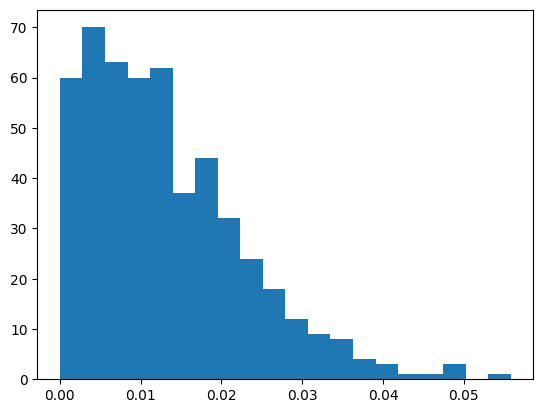

In [109]:
# Plotting distribution of the difference between the two average vectors
from matplotlib import pyplot as plt 
plt.hist(d, bins=20)
plt.show()

In [110]:
# Finding top-10 difference
d.sort(reverse=True)
n = 10
topn = []
for v in d[:n]:
    print(diff[v], v)
    topn.append(diff[v])

print(topn)

100 0.05579910159934631
316 0.04977285990747804
245 0.04963449421389029
195 0.049572661595277956
192 0.04494009428506093
202 0.04348836786255672
117 0.04149361840097242
121 0.0408331041307691
507 0.040378551378597596
499 0.03799464824568421
[100, 316, 245, 195, 192, 202, 117, 121, 507, 499]


### 2. Dimensions with intra class lowest std

In [111]:
masc_n_we.loc[:,:'511'].std().sort_values()[:10]

287    0.101875
441    0.102557
209    0.103562
365    0.104139
12     0.104285
314    0.105332
69     0.105587
338    0.106061
321    0.106727
25     0.107155
dtype: float64

In [112]:
masc_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]

347    0.147857
202    0.146926
476    0.145093
429    0.144830
361    0.142723
258    0.142311
480    0.142181
419    0.142022
219    0.141836
dtype: float64

We observe that highest std values are quite close to the lowest ones. So std seems to be low for the majority of masculine WE dimensions.

In [113]:
fem_n_we.loc[:,:'511'].std().sort_values()[:10]

83     0.100318
287    0.101198
365    0.101676
314    0.101889
209    0.102343
408    0.102378
25     0.102705
69     0.103277
441    0.105249
422    0.105414
dtype: float64

In [114]:
fem_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]

202    0.144590
476    0.143457
251    0.142205
361    0.142172
272    0.141885
132    0.141522
85     0.141353
418    0.141232
145    0.141221
dtype: float64

Same remark for feminine nouns.

Dimensions 287, 441, 209, 365, 314, 69 and 25 appear in the top-10-lowest-std for both feminine and masculine nouns. We will now observe whether the values for these dimensions are distributed equally among those two classes or not.

In [115]:
import seaborn as sns
from matplotlib import pyplot as plt

#### Distribution for dimensions 314, 287, 365 [m,f]

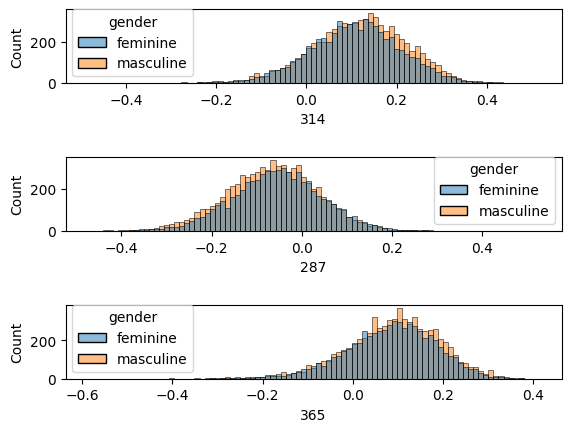

In [116]:
fig, axs = plt.subplots(3,1)
# let some space between subplots
fig.subplots_adjust(hspace=1)
sns.histplot(data = all_n_we, x = "314", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "287", hue='gender', ax=axs[1])
sns.histplot(data = all_n_we, x = "365", hue='gender', ax=axs[2])
plt.savefig("../314_287_365_for_NOUN.png")

#### Distribution for dimensions 69, 25, 209, 441 [m,f]

<AxesSubplot: xlabel='441', ylabel='Count'>

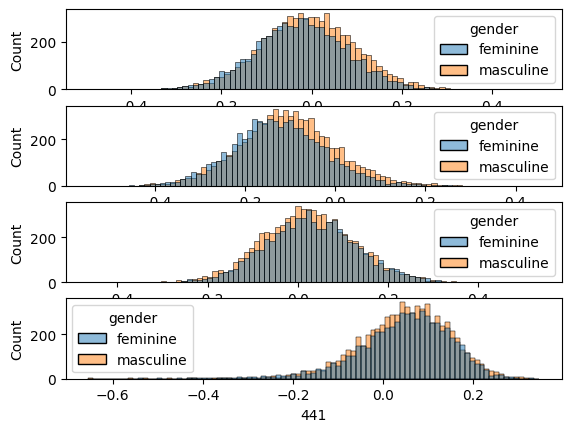

In [117]:
fig, axs = plt.subplots(4,1)
sns.histplot(data = all_n_we, x = "69", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "25", hue='gender', ax=axs[1])
sns.histplot(data = all_n_we, x = "209", hue='gender', ax=axs[2])
sns.histplot(data = all_n_we, x = "441", hue='gender', ax=axs[3])

So these 7 dimensions not only have intra-classes low std, but also extra-class low std. We reject the hypothesis that they encode gender. However, maybe they encode noun-ness.  
We will now plot the distributions of the dimensions that have low std only for masculine or for feminine nouns.

#### Distribution for dimensions 338, 321, 12 [m]

<AxesSubplot: xlabel='12', ylabel='Count'>

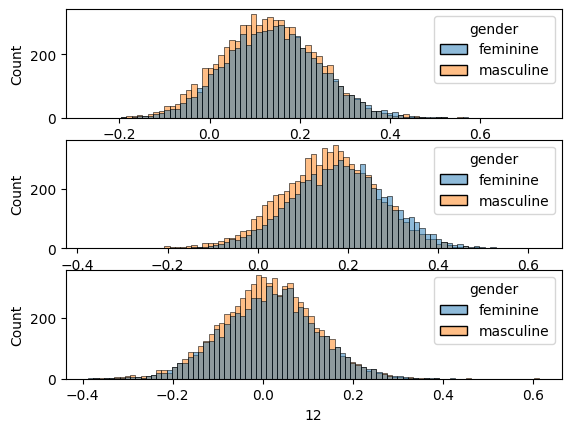

In [118]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "338", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "321", hue='gender', ax=axs[1])
sns.histplot(data = all_n_we, x = "12", hue='gender', ax=axs[2])

Once again, the distributions are largely overlapping between WE of masculine or feminine nouns.

#### Distribution for dimensions 83, 408, 422 [f]

<AxesSubplot: xlabel='422', ylabel='Count'>

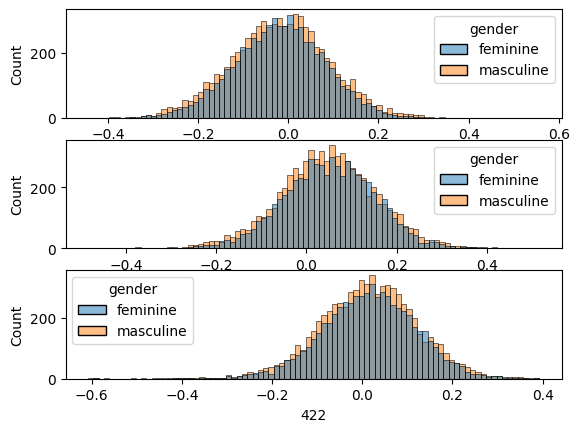

In [119]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "83", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "408", hue='gender', ax=axs[1])
sns.histplot(data = all_n_we, x = "422", hue='gender', ax=axs[2])

So none of them seem like good candidates for encoding gender. 

### 3. Correlation study

In [120]:
all_n_we["gender"] = all_n_we["gender"].apply(lambda x: 1 if x == "masculine" else 0)

In [121]:
import numpy as np
gender_corr_df = pd.DataFrame(columns=["correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(all_n_we.loc[:,[str(i), 'gender']].corr().iloc[0][-1])

gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [122]:
# Dimensions having the highest abs correlation with gender
gender_corr_df.sort_values("abs")[-10:][::-1]

,correlation_with_gender,sign,abs
100,-0.201022,-1.0,0.201022
195,-0.198300,-1.0,0.198300
316,0.192950,1.0,0.192950
245,0.181808,1.0,0.181808
507,0.179582,1.0,0.179582
192,-0.169688,-1.0,0.169688
377,0.160333,1.0,0.160333
121,0.159328,1.0,0.159328
117,-0.155730,-1.0,0.155730
403,-0.153749,-1.0,0.153749


Dimensions 100, 316, 245, 195, 192, 117, 121 and 507 were already found among the top10 with largest difference between masc_avg and fem_avg. We'll test these first.

#### Distribution for dimensions 100, 195, 117 [corr, avg_diff]

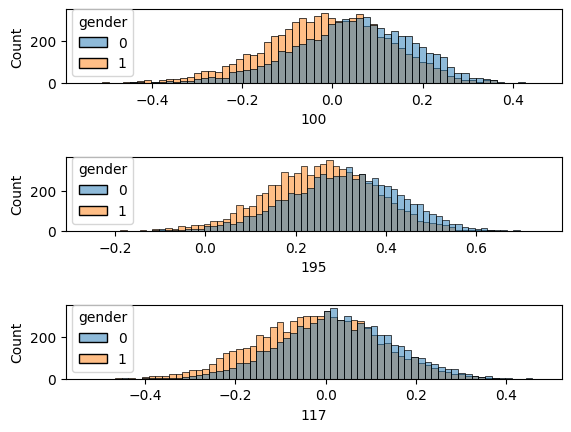

In [123]:
fig, axs = plt.subplots(3,1)
#let some space between subplots
fig.subplots_adjust(hspace=1)
sns.histplot(data = all_n_we, x = "100", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "195", hue='gender', ax=axs[1])
sns.histplot(data = all_n_we, x = "117", hue='gender', ax=axs[2])
plt.savefig("../100_195_117_for_NOUN.png")

#### Distribution for dimensions 316, 245, 192, 121, 507 [corr, avg_diff]

<AxesSubplot: xlabel='507', ylabel='Count'>

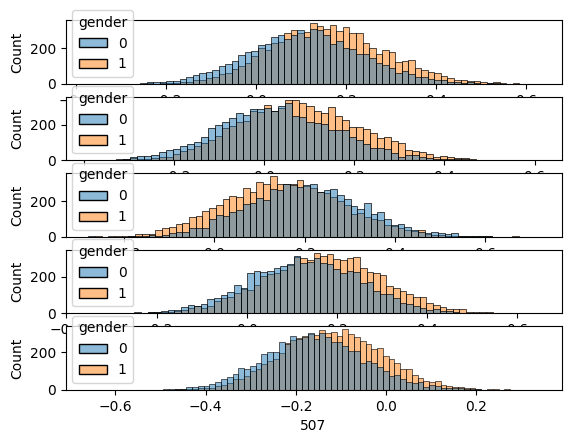

In [124]:
fig, axs = plt.subplots(5,1)
sns.histplot(data = all_n_we, x = "316", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "245", hue='gender', ax=axs[1])
sns.histplot(data = all_n_we, x = "192", hue='gender', ax=axs[2])
sns.histplot(data = all_n_we, x = "121", hue='gender', ax=axs[3])
sns.histplot(data = all_n_we, x = "507", hue='gender', ax=axs[4])

#### Distribution for dimensions 202 499 [avg_diff]

<AxesSubplot: xlabel='499', ylabel='Count'>

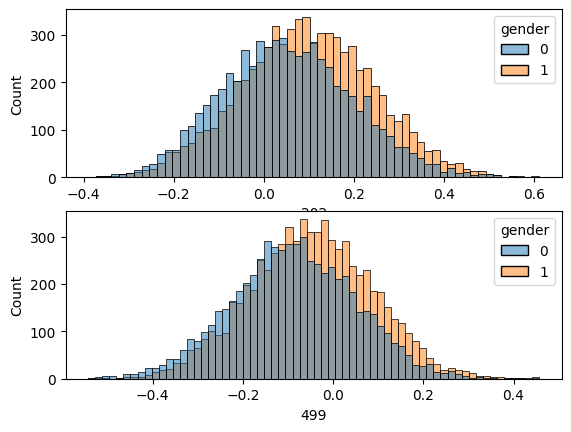

In [126]:
fig, axs = plt.subplots(2,1)
sns.histplot(data = all_n_we, x = "202", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "499", hue='gender', ax=axs[1])

#### Distribution for dimensions 377, 403 [corr]

<AxesSubplot: xlabel='403', ylabel='Count'>

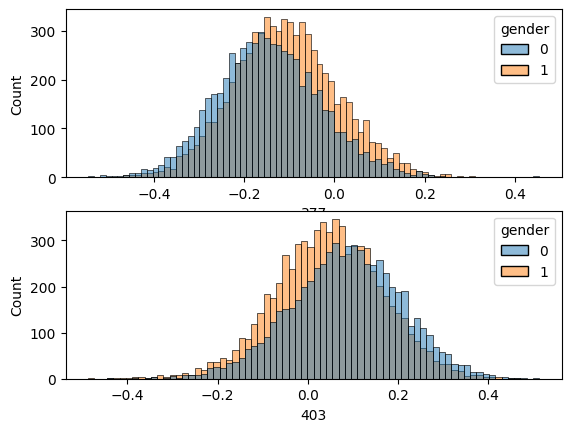

In [127]:
fig, axs = plt.subplots(2,1)

sns.histplot(data = all_n_we, x = "377", hue='gender', ax=axs[0])
sns.histplot(data = all_n_we, x = "403", hue='gender', ax=axs[1])

### 4. Dimension analysis : 100 
From the distribution, we see that feminine nouns tend to have higher values for this dimension that masculine nouns.

<AxesSubplot: xlabel='100', ylabel='Count'>

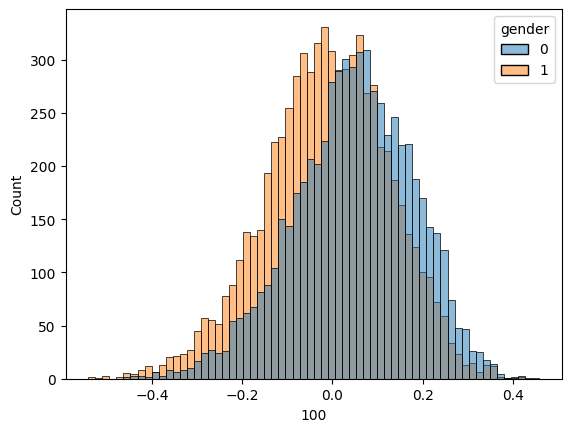

In [128]:
sns.histplot(data = all_n_we, x = "100", hue='gender')

#### Low values

In [129]:
masc_n_we.sort_values("100")[:20]["100"]

Word
caisson       -0.541762
tibétain      -0.527608
yoga          -0.512232
beurre        -0.505402
fossile       -0.502883
liège         -0.495699
découvert     -0.474681
vice          -0.474207
bambou        -0.458392
yaourt        -0.457778
chêne         -0.456811
physicien     -0.453251
télescope     -0.451457
immédiats     -0.444411
sèche-linge   -0.440171
lubrifiants   -0.436257
plaqué        -0.433876
albédo        -0.432045
culot         -0.430288
bouddhisme    -0.429375
Name: 100, dtype: float64

In [130]:
fem_n_we.sort_values("100")[:20]["100"]

Word
incomplète   -0.458054
inspirées    -0.452452
sèches       -0.447664
touche       -0.447609
apparentes   -0.433728
horlogerie   -0.431263
bique        -0.424032
plane        -0.421598
voïvodie     -0.405963
poire        -0.401995
présente     -0.400421
pierre       -0.397166
luge         -0.392381
commune      -0.391850
astronome    -0.389005
carrées      -0.385624
poires       -0.379756
pérennité    -0.376402
seconde      -0.374717
enterrée     -0.369864
Name: 100, dtype: float64

In [132]:
fem_n_we.sort_values("100")[:-20:-1]["100"]

Word
attitude          0.437460
visibilité        0.421172
organisatrice     0.419213
gêne              0.413352
prestation        0.403660
rapidité          0.384997
brochure          0.379077
implémentation    0.373450
manifestation     0.372534
rues              0.366883
affluence         0.363076
présence          0.363011
distribution      0.362353
sévérité          0.362304
enchère           0.362095
régulation        0.359915
tarification      0.359452
soumission        0.359420
intervention      0.358681
Name: 100, dtype: float64

In [133]:
masc_n_we.sort_values("100")[:-20:-1]["100"]

Word
voyant            0.458238
affectant         0.414023
items             0.411490
cout              0.407228
foutre            0.401591
tee               0.384260
venant            0.366642
obligeant         0.366552
informant         0.364467
pal               0.364314
arrivant          0.363113
payant            0.360248
rentrant          0.359345
ayant             0.358379
pleurant          0.356178
coordonnateurs    0.356146
inconfort         0.353264
organisateurs     0.350788
quotas            0.349537
Name: 100, dtype: float64

Although no clear statement can be done, it seems that low values on dim 100 correlate with words depicting animal/mineral/beings/food or at least physical and concrete beings and artefacts (bambou, chêne, dinosaures, requin, noisettes, araignées) - but this is more visible in masculine nouns.

Higher values seem to correlate more with abstract concepts and qualities or places (attitude, visibilité, manifestation, sévérité, tarification, dédain, inconfort). For feminine nouns with higher values, a higher register of langage is seen that in masculine nouns with higher values.

## 2. Adjectives  
We will now study adjectives the same way.

### Results  
- Dimensions: 234, 466, 133, 507, 436, 88, 439, 180, 276, 5 have the highest correlation with gender (ranging from 0.41 to 0.30)  
- None of these dimensions were considered as candidates for gender encoding in the previous experiment with nouns

### 0. Data loading

In [51]:
# import pandas as pd
# top_freq_a = pd.read_csv('../Data/Frequency/top_frequent_pure_ADJ_Morphalou.csv', index_col="Word")
# top_freq_a = top_freq_a.drop(columns=[ "cgram", "freqlemlivres", "Unnamed: 0"])
# top_masc_a = top_freq_a[top_freq_a["genre"] == "m"][:319]
# top_fem_a = top_freq_a[top_freq_a["genre"] == "f"] [:319]

In [52]:
# top_masc_a

,lemme,genre,number
Word,,,
sûr,sûr,m,singular
sûrs,sûr,m,plural
aucun,aucun,m,singular
léger,léger,m,singular
cher,cher,m,singular
...,...,...,...
relationnel,relationnel,m,singular
salariaux,salarial,m,plural
sociétal,sociétal,m,singular


In [44]:
# top_fem_a

,lemme,genre,number
Word,,,
vraies,vrai,f,plural
sûre,sûr,f,singular
sûres,sûr,f,plural
pleines,plein,f,plural
certaine,certain,f,singular
...,...,...,...
avoisinantes,avoisinant,f,plural
abusive,abusif,f,singular
inhérente,inhérent,f,singular


In [138]:
# Now getting the WE for our samples
all_a_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv', index_col=0).drop(columns = ["number"])
all_a_we["gender"] = all_a_we["gender"].apply(lambda x: 1 if x == "masculine" else 0)
# Normalization
for i in range(512):
    values, copy = list(all_a_we[str(i)]), list(all_a_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_a_we[str(i)] = [val / (max_ - min_) for val in values]

# masc_a_we = all_a_we.merge(top_masc_a, left_index=True, right_index=True)
# fem_a_we = all_a_we.merge(top_fem_a, left_index=True, right_index=True)

masc_a_we = all_a_we[all_a_we["gender"] == 1]
fem_a_we = all_a_we[all_a_we["gender"] == 0]

In [139]:
masc_a_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,gender
Word,,,,,,,,,,,,,,,,,,,,,
abaissé,-0.042944,-0.121588,0.253221,-0.018416,-0.112224,-0.165065,0.064048,0.061435,0.149173,0.250338,...,0.122576,-0.151062,0.030704,-0.000267,-0.215452,-0.496838,-0.143455,0.109168,-0.033071,1
abandonné,0.189704,0.042860,0.038961,-0.143346,-0.009533,-0.411331,-0.126751,0.057869,-0.134712,-0.081770,...,-0.152498,-0.022323,-0.239252,-0.003259,-0.327105,-0.280536,-0.291624,0.131377,-0.261618,1
abattu,0.192408,-0.098454,0.197049,-0.005491,-0.074786,-0.149410,0.077398,0.110115,0.185678,0.083753,...,-0.079404,-0.251517,-0.138261,-0.156556,-0.228935,-0.390281,-0.197627,-0.109574,-0.167557,1
aboli,0.163258,-0.044586,-0.099954,0.103791,-0.071420,0.022540,0.111578,0.115080,-0.141150,0.034744,...,-0.020278,-0.026828,0.017501,0.117476,-0.256992,-0.205790,-0.294415,-0.241071,-0.205843,1
abondant,0.128294,-0.309477,0.021504,0.137204,0.412875,-0.257000,-0.016623,-0.150615,-0.092315,0.112267,...,-0.037446,0.085360,-0.010056,-0.303157,-0.131555,-0.196813,-0.067730,-0.119372,-0.116787,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
piétonne,0.257201,-0.244977,0.089563,-0.190143,-0.017258,-0.138404,0.044417,0.166191,0.170741,0.414465,...,-0.152195,0.137094,-0.149478,0.109291,-0.119269,-0.203365,-0.015786,0.142890,-0.043434,1
portière,0.285266,-0.036739,0.009082,-0.197760,-0.245912,-0.028633,-0.126294,-0.181729,0.187068,0.020058,...,-0.027160,0.078580,-0.264909,0.116277,-0.125227,-0.241281,-0.159849,0.157999,0.058919,1
relative,-0.133190,-0.191939,-0.112283,-0.071033,-0.013085,-0.104034,-0.164546,0.199233,-0.000491,-0.111681,...,-0.034906,-0.200588,0.251246,0.220833,-0.022318,-0.028593,-0.060351,-0.112523,-0.101752,1


In [140]:
fem_a_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,gender
Word,,,,,,,,,,,,,,,,,,,,,
abandonnée,0.187844,0.057632,0.030728,-0.146254,0.006053,-0.349509,-0.202713,-0.008721,-0.186640,-0.004116,...,0.028148,-0.055999,-0.220582,-0.089461,-0.349178,-0.248097,-0.260102,0.218007,-0.030118,0
abattue,0.262521,0.041142,0.100234,-0.003681,-0.014012,-0.271212,-0.066922,0.094466,0.108451,0.073647,...,0.046444,-0.070793,-0.096889,-0.202808,-0.440771,-0.435730,-0.175278,-0.053322,-0.011823,0
abdominale,0.212532,-0.012562,0.240196,0.033510,0.016741,-0.201427,-0.128176,-0.380649,0.453501,0.300543,...,0.323445,-0.036779,-0.085766,-0.001671,-0.124955,-0.287988,-0.000282,0.214506,-0.217089,0
abondante,0.178926,-0.244048,0.052840,-0.061612,0.316563,-0.277504,-0.083215,-0.110003,0.039679,0.117515,...,-0.043452,0.190072,-0.067298,-0.358787,-0.191599,-0.169430,-0.132200,0.000891,-0.068334,0
abordée,0.216258,-0.047302,0.195290,0.123992,0.123801,-0.148760,-0.143809,0.222637,0.093868,-0.245310,...,0.216431,-0.256243,-0.056416,0.155099,0.039633,-0.300003,-0.319572,0.055379,-0.202980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évacuées,0.115877,-0.011350,0.035997,0.028827,0.059654,-0.337283,-0.030697,0.137083,0.076271,0.090022,...,0.168681,-0.053678,0.043680,-0.281998,-0.324693,-0.468845,-0.198282,0.158278,0.024740,0
évaluées,0.337002,0.047981,0.129326,0.179921,-0.014418,-0.253125,0.060555,0.195933,-0.015158,0.037804,...,0.329961,-0.086322,0.026354,-0.021133,-0.143766,-0.024202,-0.336136,0.200033,-0.124185,0
éventuelles,-0.216523,-0.101876,-0.100012,0.012300,-0.029418,-0.180825,-0.049696,-0.213698,0.252523,-0.072447,...,0.024550,-0.129838,-0.264718,-0.002919,-0.006518,-0.436265,-0.135772,0.223473,-0.011749,0


### 1. Correlation study

In [141]:
import numpy as np
gender_corr_df = pd.DataFrame(columns=["correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(all_a_we.loc[:,[str(i), 'gender']].corr().iloc[0][-1])

gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [142]:
# Dimensions having the highest abs correlation with gender
gender_corr_df.sort_values("abs")[-10:][::-1]

,correlation_with_gender,sign,abs
466,0.347641,1.0,0.347641
439,-0.306494,-1.0,0.306494
250,0.306199,1.0,0.306199
503,-0.305685,-1.0,0.305685
133,-0.296369,-1.0,0.296369
245,0.287354,1.0,0.287354
234,0.283759,1.0,0.283759
432,0.278664,1.0,0.278664
181,-0.262315,-1.0,0.262315
121,0.254556,1.0,0.254556


### 3. Dimension 466

<AxesSubplot: xlabel='466', ylabel='Count'>

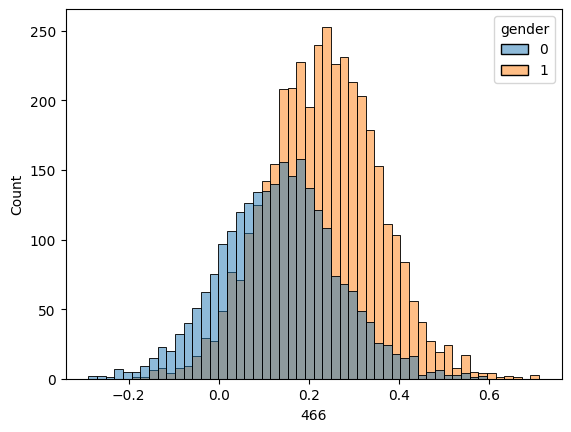

In [143]:
import seaborn as sns
sns.histplot(data = all_a_we, x = "466", hue='gender')

Masculine adjectives tend to have higher values for this dimension than feminine adjectives.

In [145]:
masc_a_we.sort_values("466")[:-20:-1]["466"]

Word
retraits          0.710174
consultés         0.704480
nord-américain    0.692632
médaillé          0.656415
expatriés         0.636250
cubain            0.635467
automatisé        0.615088
canadien          0.611473
siens             0.607149
turcs             0.606475
ottoman           0.603897
londonien         0.589527
australien        0.585992
émigré            0.577124
turc              0.576738
haïtien           0.574962
gagnés            0.572158
émigrés           0.564494
forgé             0.562241
Name: 466, dtype: float64

In [146]:
fem_a_we.sort_values("466")[:20]["466"]

Word
agréées           -0.289826
sélectionnée      -0.288793
définie           -0.265351
induite           -0.262245
ordonnées         -0.244678
inversée          -0.229450
soupçonnée        -0.229062
notée             -0.225931
correspondantes   -0.224817
dépendante        -0.223184
cachées           -0.221842
classée           -0.217578
définies          -0.210309
subordonnée       -0.203278
expliquée         -0.202879
patronale         -0.202407
résiduelle        -0.198979
classées          -0.187706
dérivée           -0.185175
nommées           -0.177951
Name: 466, dtype: float64

## 3. Nouns and adjectives

In [150]:
# concatenate the datasets of nouns and adjectives
all_n_a_we = pd.concat([all_n_we, all_a_we])
all_n_a_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,gender
Word,,,,,,,,,,,,,,,,,,,,,
abaisse,0.220459,-0.185174,0.045101,0.178714,-0.108041,-0.185223,-0.038133,-0.035881,0.206875,0.197348,...,0.185762,-0.084412,0.023871,-0.052849,-0.267209,-0.440458,-0.227911,-0.021792,-0.070034,0
abandonnée,0.186562,0.062755,0.030736,-0.143579,0.006462,-0.319613,-0.188934,-0.008268,-0.178685,-0.003653,...,0.023211,-0.053564,-0.200903,-0.081681,-0.337104,-0.226090,-0.244174,0.193163,-0.026614,0
abattue,0.260729,0.044799,0.100262,-0.003613,-0.014958,-0.248013,-0.062373,0.089560,0.103828,0.065361,...,0.038298,-0.067715,-0.088245,-0.185171,-0.425530,-0.397078,-0.164545,-0.047245,-0.010448,0
abbaye,0.205826,-0.215930,0.101201,0.006262,0.232492,-0.271341,-0.203044,-0.136419,-0.081058,0.065823,...,-0.279662,0.199704,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.219602,0
abdominale,0.211081,-0.013678,0.240263,0.032897,0.017872,-0.184198,-0.119463,-0.360880,0.434171,0.266727,...,0.266714,-0.035179,-0.078115,-0.001525,-0.120634,-0.262442,-0.000265,0.190060,-0.191832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évaluées,0.337002,0.047981,0.129326,0.179921,-0.014418,-0.253125,0.060555,0.195933,-0.015158,0.037804,...,0.329961,-0.086322,0.026354,-0.021133,-0.143766,-0.024202,-0.336136,0.200033,-0.124185,0
éventuelles,-0.216523,-0.101876,-0.100012,0.012300,-0.029418,-0.180825,-0.049696,-0.213698,0.252523,-0.072447,...,0.024550,-0.129838,-0.264718,-0.002919,-0.006518,-0.436265,-0.135772,0.223473,-0.011749,0
évidentes,0.196965,-0.005879,0.190735,0.057461,-0.010534,-0.176981,-0.238832,0.102737,0.010954,-0.315445,...,0.171216,0.141069,-0.035503,0.041717,-0.085636,-0.089069,-0.380767,0.139658,-0.223387,0


### Correlation

In [148]:
gender_corr_df = pd.DataFrame(columns=["correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(all_n_a_we.loc[:,[str(i), 'gender']].corr().iloc[0][-1])

gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [149]:
# Dimensions having the highest abs correlation with gender
gender_corr_df.sort_values("abs")[-10:][::-1]

,correlation_with_gender,sign,abs
245,0.213962,1.0,0.213962
192,-0.199912,-1.0,0.199912
507,0.193099,1.0,0.193099
121,0.192949,1.0,0.192949
250,0.183402,1.0,0.183402
5,0.176098,1.0,0.176098
181,-0.174868,-1.0,0.174868
377,0.170472,1.0,0.170472
195,-0.168639,-1.0,0.168639
439,-0.168557,-1.0,0.168557
